## Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
df = pd.read_excel('Emotion-Detection-preprocessing.xlsx',index_col=0)
df.dropna(inplace=True)

###                "happiness"  ---> 0   and "sadness"   ---> 1

In [3]:
Cat = []
for i in df.sentiment:
    if i == 'happiness':
        Cat.append(0)
    else:
        Cat.append(1)
        
df['sentiment'] = Cat

## TF-IDF Vectorization

In [4]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.content).toarray()
labels = df.sentiment


Shape of features:  (39985, 7286)

Count Plot :


<AxesSubplot:xlabel='sentiment'>

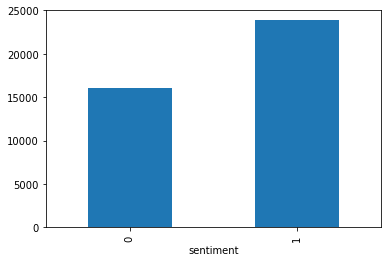

In [5]:
print('\nShape of features: ',features.shape)
print('\nCount Plot :')
df.groupby('sentiment').sentiment.count().plot.bar(ylim=0)

# Model Building

## ---------------------------------------- Multinomial Naive Bayes ------------------------------------------------

Classification report for Multinomial Naive Bayes Algorithm : 
               precision    recall  f1-score   support

           0       0.67      0.46      0.54      3160
           1       0.71      0.86      0.77      4837

    accuracy                           0.70      7997
   macro avg       0.69      0.66      0.66      7997
weighted avg       0.69      0.70      0.68      7997



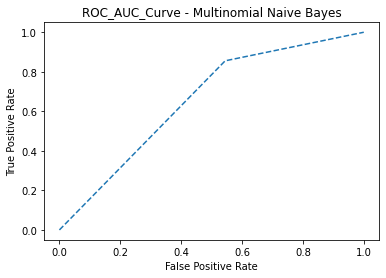

Confusion Matrix for Multinomial Naive Bayes algorithm :


<AxesSubplot:>

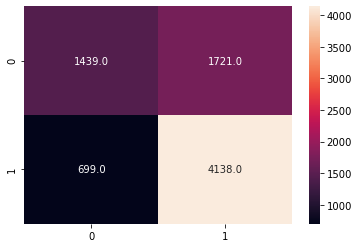

In [6]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, train_size=0.8, random_state=42)

#---------------------------------------- Multinomial Naive Bayes ------------------------------------------------

NB = MultinomialNB(alpha=1)
NB.fit(X_train, y_train)

NB_y_pred = NB.predict(X_test)
NB_Conf = confusion_matrix(y_test,NB_y_pred)
print('Classification report for Multinomial Naive Bayes Algorithm : \n',classification_report(y_test,NB_y_pred))

print("====================================================================================================================")

fpr, tpr, _ = metrics.roc_curve(y_test, NB_y_pred)
auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC_Curve - Multinomial Naive Bayes')
plt.show()

print("====================================================================================================================")
print('Confusion Matrix for Multinomial Naive Bayes algorithm :')

sns.heatmap(NB_Conf,annot=True,fmt='.1f')

## ---------------------------------------- Decision Tree Classifier ------------------------------------------------

Classification report for Decision Tree Algorithm : 
               precision    recall  f1-score   support

           0       0.72      0.22      0.33      3160
           1       0.65      0.95      0.77      4837

    accuracy                           0.66      7997
   macro avg       0.69      0.58      0.55      7997
weighted avg       0.68      0.66      0.60      7997



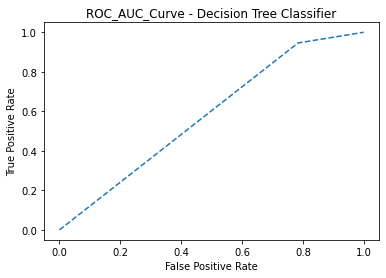

Confusion Matrix for Decision Tree Classifier :


<AxesSubplot:>

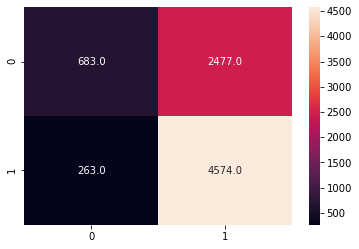

In [7]:
#---------------------------------------- Decision Tree Classifier ------------------------------------------------

D_model = DecisionTreeClassifier(random_state=0, max_depth=3)
D_model.fit(X_train,y_train)

y_pred = D_model.predict(X_test)
DT_Conf = confusion_matrix(y_test,y_pred)
print('Classification report for Decision Tree Algorithm : \n', classification_report(y_test,y_pred))

print("====================================================================================================================")

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC_Curve - Decision Tree Classifier')
plt.show()

print("====================================================================================================================")
print('Confusion Matrix for Decision Tree Classifier :')

sns.heatmap(DT_Conf,annot=True,fmt='.1f')

## ------------------------------------------- Logistic Regression ------------------------------------------------

Classification report for Logistic Regression Algorithm : 
               precision    recall  f1-score   support

           0       0.67      0.52      0.58      3160
           1       0.73      0.83      0.77      4837

    accuracy                           0.71      7997
   macro avg       0.70      0.68      0.68      7997
weighted avg       0.70      0.71      0.70      7997



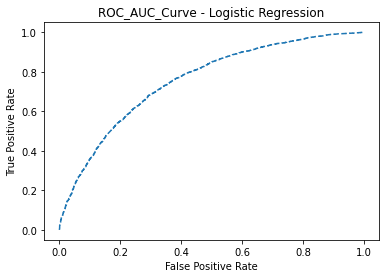

Confusion Matrix for Logistic Regression :


<AxesSubplot:>

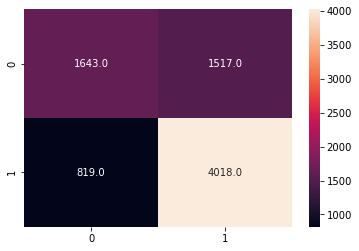

In [8]:

#------------------------------------------- Logistic Regression ------------------------------------------------

lgs = LogisticRegression(C=1)
lgs.fit(X_train,y_train)
pred = lgs.predict(X_test)
print('Classification report for Logistic Regression Algorithm : \n',classification_report(y_test,pred))
lg_conf = confusion_matrix(y_test,pred)

#ROC_AUC_Curve
print("====================================================================================================================")

fpr, tpr, _ = metrics.roc_curve(y_test, (lgs.predict_proba(X_test)[:, 1]))
auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC_Curve - Logistic Regression')
plt.show()

#------------------------------------------------Confusion matrix ---------------------------------------------------
print("====================================================================================================================")
print('Confusion Matrix for Logistic Regression :')

sns.heatmap(lg_conf,annot=True,fmt='.1f')

## Model Comparison

Performance comparison : 


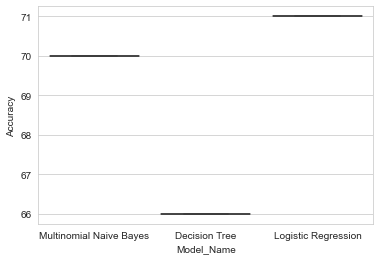

In [9]:
model = ['Multinomial Naive Bayes','Decision Tree','Logistic Regression']
acc = [70,66,71]
evalu = pd.DataFrame()
evalu['Model_Name'] = model
evalu['Accuracy'] = acc

print('Performance comparison : ')
sns.set_style('whitegrid')
ax= sns.boxplot(x='Model_Name',y='Accuracy',data=evalu)

# Inferences:
    1. Sentiment classes :
        > "happiness" - 0
        > "sadness" - 1
        
    2. Model building :
        -------------------------------------- Multinomial Naive Bayes (alpha=1) -------------------------------------
         
        > Accuracy obtained : 70
        > Plotted ROC curve
        > Precision :
            0 - 0.67
            1 - 0.71
        > Recall :
            0 - 0.48
            1 - 0.86
            
        -------------------------------------- Decision Tree Classifier(max_depth = 3) ------------------------------
         
        > Accuracy obtained : 66
        > Plotted ROC curve
        > Precision :
            0 - 0.72
            1 - 0.65
        > Recall :
            0 - 0.22
            1 - 0.95
            
        ------------------------------------- Logistic Regression(C=1) ----------------------------------------
         
        > Accuracy obtained : 71
        > Plotted ROC curve
        > Precision :
            0 - 0.67
            1 - 0.73
        > Recall :
            0 - 0.52
            1 - 0.83
            
# Conclusion :
        On comparing Accuracy score,Precision,Recall and ROC-AUC curve - Logistic Regression algorithm performs better with
    higher accuracy and defined ROC-AUC curve.